In [34]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import randint
import branca.colormap as cm

def create_other_features_gdf(fp):
    df = pd.read_csv(fp)
    geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    return gdf

n_clusters=5

In [2]:
melbourne_sensors = pd.read_csv("../Data/FootfallData/melbourne_locations.csv")
melbourne_sensors.rename(columns={'sensor_description': 'Name'}, inplace = True)
melbourne_sensors = melbourne_sensors.drop_duplicates('sensor_id', keep='first')

In [3]:
# # Spatialise it
# landmarks = gpd.GeoDataFrame(landmarks, crs="EPSG:4326",
#                              geometry=gpd.points_from_xy(landmarks.Longitude, landmarks.Latitude))

In [13]:
test = melbourne_sensors[['Latitude','Longitude']].copy()
# Initialize KMeans instance
kmeans = KMeans(n_clusters=n_clusters)
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(test)
# Add columns
test["k5cls"] = k5cls.labels_

In [151]:
# test.groupby('k5cls').count()

In [35]:
color = []
n = n_clusters
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))   

color = ['black']* (n_clusters-1) + ['blue']

linear = cm.StepColormap(color, vmin=gdf['k5cls'].min(), vmax=gdf['k5cls'].max())    
linear

In [52]:

# Plot the basic map        
f = folium.Figure(width=800, height=600)
melbourne_map = folium.Map(location=[-37.81426902667574, 144.97034862684487], zoom_start=13, control_scale=True,
                           tiles='cartodbpositron',
                           min_zoom = 10).add_to(f)


bus_stops_fg=folium.FeatureGroup(name='Bus Stops', show=False)
melbourne_map.add_child(bus_stops_fg)
for index, location_info in test.iterrows():
    folium.CircleMarker([location_info["Latitude"], location_info["Longitude"]], radius=7, fill = True,
                        color= linear(location_info['k5cls']),fill_color=linear(location_info['k5cls']),
                        fill_opacity=1).add_to(bus_stops_fg)    
    
melbourne_map    

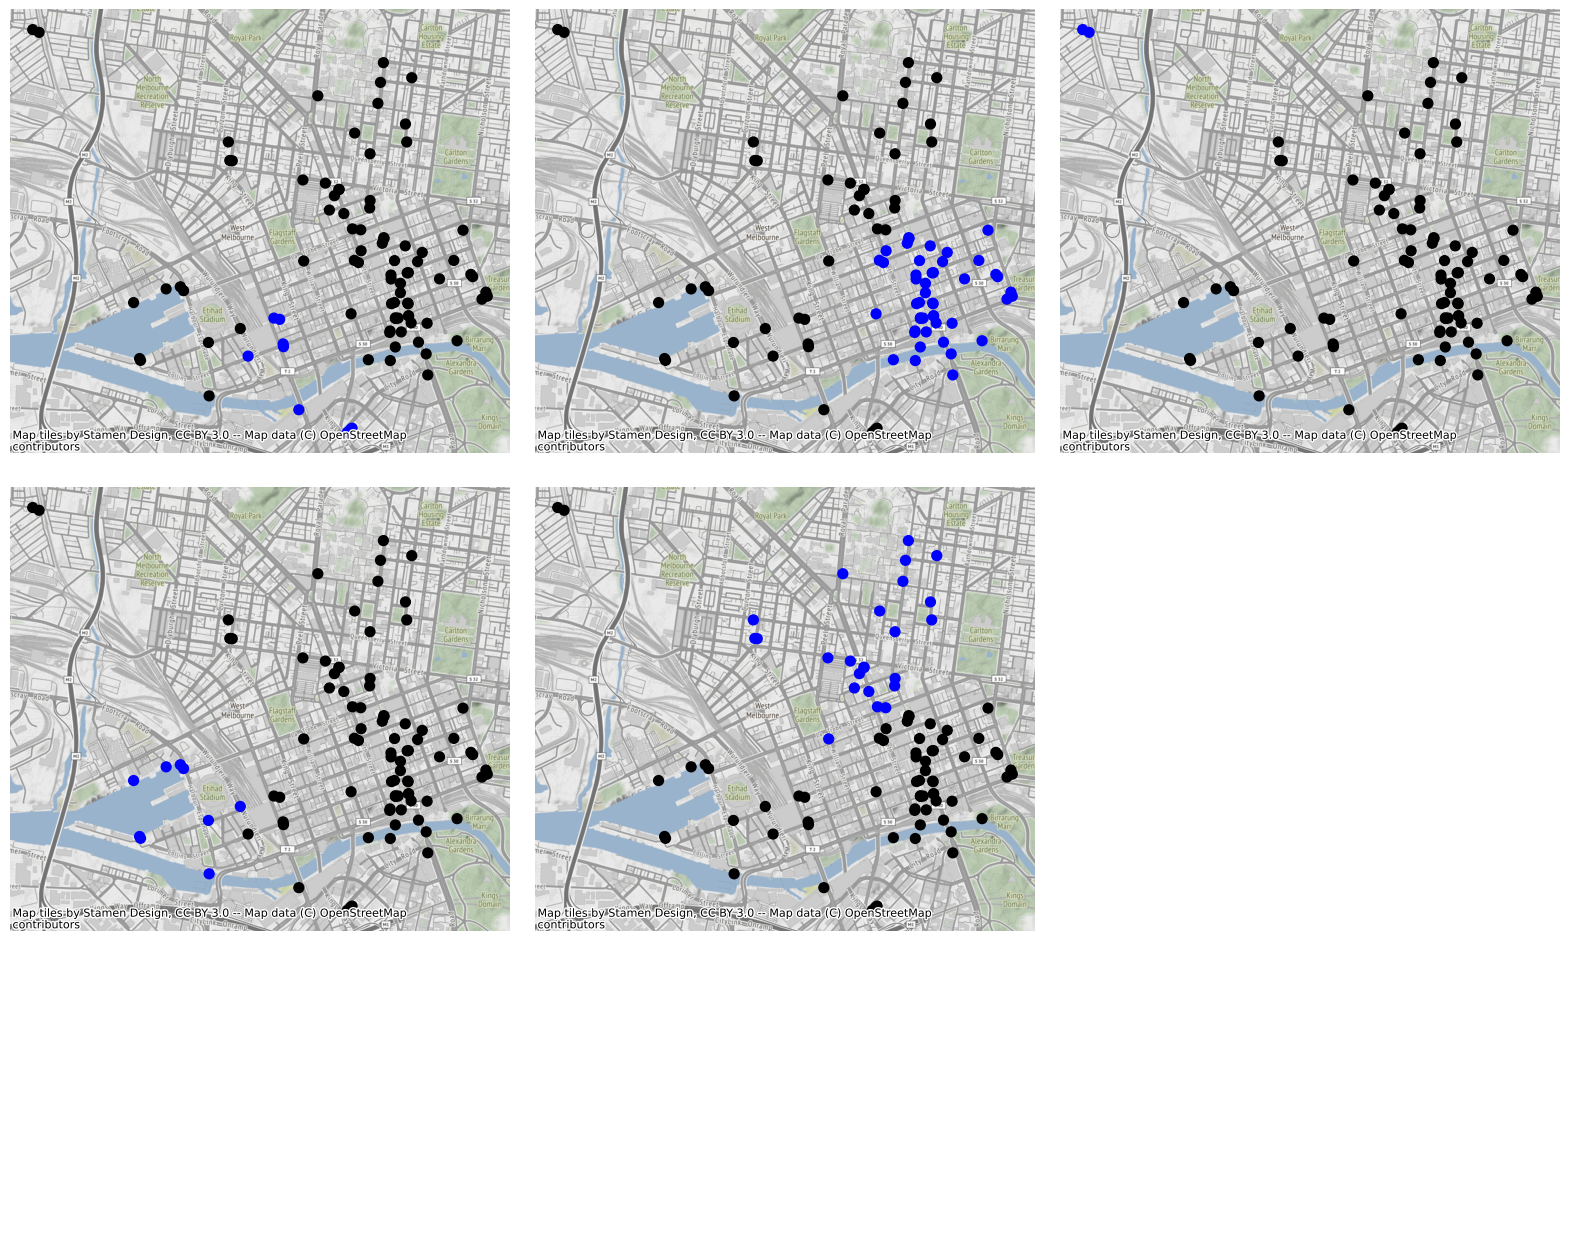

In [112]:
geometry = [Point(xy) for xy in zip(test.Longitude, test.Latitude)]
gdf = gpd.GeoDataFrame(test, geometry=geometry)
gdf = gdf.set_crs('EPSG:4326')
gdf = gdf.to_crs('epsg:3857')
colors_ls = ['black', 'black','black', 'black','black']

import matplotlib.colors as colors
fig, axs = plt.subplots(2,3,figsize=(20,20))
for num, ax in enumerate(axs.flatten()):
    if num <5:
        colors_ls[num] = 'blue'
        gdf.plot(column=gdf.k5cls, ax = ax, markersize = 50, cmap=colors.ListedColormap(colors_ls))
        cx.add_basemap(ax = ax)
        ax.axis('off')
        colors_ls[num] = 'black';
    else:
        ax.set_axis_off()
        
fig.subplots_adjust(hspace=-0.55, wspace=0.05)     